In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from PIL import Image
import imagesize

from sklearn.preprocessing import LabelEncoder

In [2]:
# train_data = np.array([np.array(Image.open('Train/' + image_jpg)) for image_jpg in training_descriptions['filename']])
# test_data = np.array([np.array(Image.open('Test/' + image_jpg)) for image_jpg in testing_descriptions['filename']])
# train_data, test_data = train_data / 255, test_data / 255

In [3]:
bloodcells = os.listdir("bloodcells_dataset")

print(bloodcells)

bloodcells.remove('.DS_Store')
bloodcells.remove('All_Images')

['basophil', 'neutrophil', '.DS_Store', 'ig', 'monocyte', 'All_Images', 'eosinophil', 'erythroblast', 'lymphocyte', 'platelet']


In [72]:
images = os.listdir('bloodcells_dataset/' + bloodcells[0])
df = pd.DataFrame(data = {'images': images, 'type': bloodcells[0], 'height': np.nan, 'width': np.nan})
# df = df.drop_duplicates()
for i in range(1, len(bloodcells)):

    images = os.listdir('bloodcells_dataset/' + bloodcells[i]) # jpg string paths
    
    images_df = pd.DataFrame(data = {'images': images, 'type': bloodcells[i], 'height': np.nan, 'width': np.nan})
    
    df = pd.concat([df, images_df])

le = LabelEncoder()

df['width'] = df['images'].apply(lambda x: imagesize.get('bloodcells_dataset/All_Images/' + x)[0])
df['height'] = df['images'].apply(lambda x: imagesize.get('bloodcells_dataset/All_Images/' + x)[1])
labeled = df["type"]


df['type'] = le.fit_transform(df['type'])
df.index = range(len(df.index))


#df[['images']].value_counts().reset_index(name = 'count').sort_values(by = ['count'], ascending = False)

df = df[df["images"].str.contains("copy") == False]

In [5]:
df[['height', 'width']].value_counts().reset_index(name = 'count')

,height,width,count
0,363,360,16639
1,369,366,250
2,360,360,198
3,361,360,2
4,360,359,1
5,360,361,1
6,360,362,1


In [6]:
df[df['width'] == 361]

,images,type,height,width
5763,IG_771333.jpg,3,360,361


The dimensions of the image are: 363 x 360


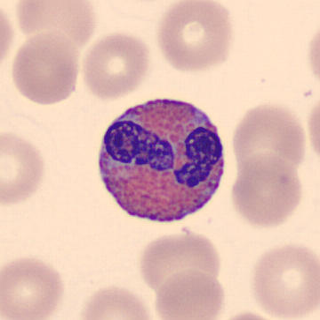

In [7]:
test_img = Image.open('bloodcells_dataset/All_Images/' + df['images'][14000])

width, height = test_img.size

print("The dimensions of the image are:", height, 'x', width)

test_img.resize((320, 320))

(320, 320, 3)


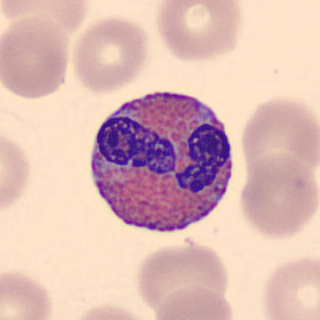

In [8]:
test_img2 = test_img.crop((20, 20, 340, 340))

print(np.array(test_img2).shape)

test_img2

In [9]:
# test1 = df[df['type'] == 'basophil']
# test2 = df[df['type'] == 'platelet']

# test = df[(df['height'] == 363) & (df['width'] == 360)]

# HOW DO WE WANT TO RESIZE?

test = df.head(500) # do in batches of 5000

x = np.array([np.array(Image.open('bloodcells_dataset/All_Images/' + image).resize((300, 300))) for image in test['images']])

x.shape


(500, 300, 300, 3)

In [10]:
# check = np.array(Image.open('bloodcells_dataset/All_Images/' + df[['images'][0]))

# check.shape

df['images']

0              BA_689200.jpg
1              BA_883452.jpg
2              BA_382161.jpg
3              BA_175579.jpg
4              BA_775722.jpg
                ...         
20204    PLATELET_495918.jpg
20205    PLATELET_897238.jpg
20206    PLATELET_750430.jpg
20207    PLATELET_810431.jpg
20208    PLATELET_499850.jpg
Name: images, Length: 17092, dtype: object

In [26]:
df["type_count"] = df["type"].value_counts()
df.drop(columns = "type_count")


,images,type,height,width
0,BA_689200.jpg,0,363,360
1,BA_883452.jpg,0,363,360
2,BA_382161.jpg,0,369,366
3,BA_175579.jpg,0,363,360
4,BA_775722.jpg,0,363,360
...,...,...,...,...
20204,PLATELET_495918.jpg,7,363,360
20205,PLATELET_897238.jpg,7,363,360
20206,PLATELET_750430.jpg,7,363,360
20207,PLATELET_810431.jpg,7,363,360


In [37]:
data = df["type"].value_counts()

## Visuals

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


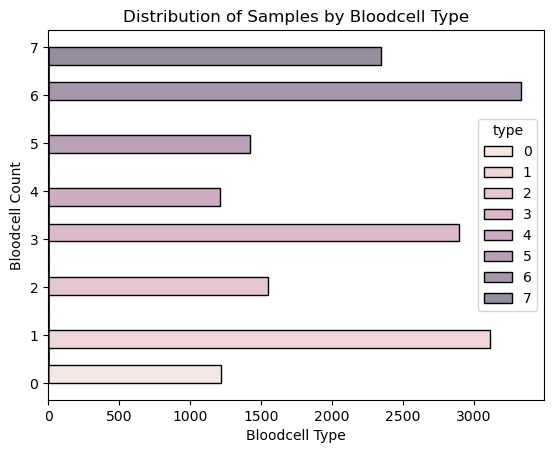

In [65]:
sns.histplot(y = df["type"], hue = df["type"])
plt.xlabel("Bloodcell Type")
plt.ylabel("Bloodcell Count")
plt.title("Distribution of Samples by Bloodcell Type")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


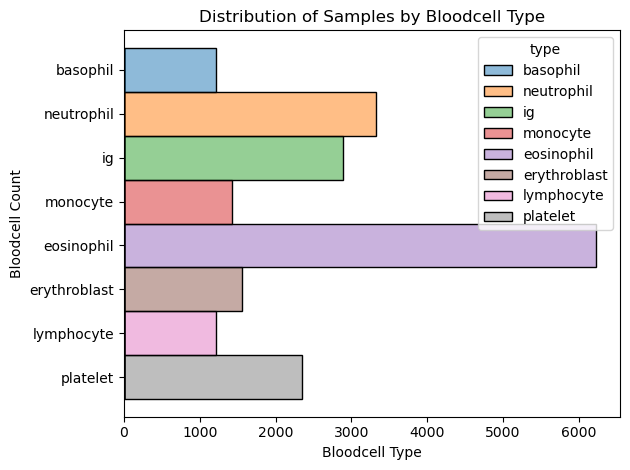

In [75]:
#visualilze data distribution by types

fig = sns.histplot(y = labeled, hue = labeled)
plt.xlabel("Bloodcell Type")
plt.ylabel("Bloodcell Count")
plt.title("Distribution of Samples by Bloodcell Type")
plt.tight_layout()
plt.show()

By looking at the visual above, we can see that we have an unbalanced dataset. Eosinophil, the most represented type class, has over 6000 samples compared to our least represented classes, Basophil and Lymphocyte, which hover a bit above the 1000 mark. This means that in order to obtain unbiased (or as close to unbiased as we can achieve) results, we will need to rebalance the dataset with one of two ways: downsampling and/or upweighting